In [1]:
#Cargamos las librerias necesarias.
#Al usar keras 2.15 no permitió usar su propia matriz de confusión, es por ello que usamos el de sk-learn
#Cargamos directamente de Keras el dataset fashion-mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Cargar y dividir los datos, tamaño de la imagen es de 28 x 28
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


In [3]:
# Preprocesamiento de datos y categorización
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

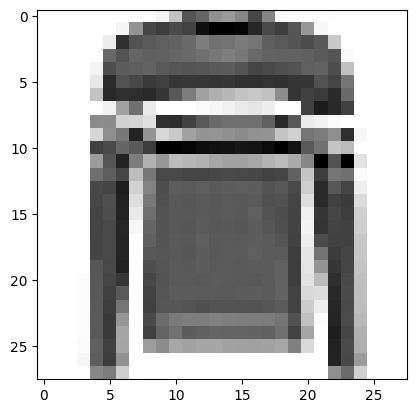

In [4]:
#Graficamos uno de los artículos del dataset para observar
plt.imshow(X_train[5], cmap='Greys')

In [6]:
# Definimos la red neuronal con el modelo CNN
# Se toma como base el ejercicio hecho en clase, el Dropout nos ayudó a mejorar en algo el modelo.
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
#Capas y parámetros del modelo creado
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [8]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# Entrenamos el modelo
# Con 30 epocas nos da un accuracy de 91.40
# Con 80 epocas nos da un accuracy mejor, pero le toma su tiempo.
model.fit(X_train, y_train, epochs=80, batch_size=128, verbose=1, validation_split=0.1)


Epoch 1/80


422/422 [==============================] - 22s 46ms/step - loss: 0.6272 - accuracy: 0.7743 - val_loss: 0.4026 - val_accuracy: 0.8532
Epoch 2/80
422/422 [==============================] - 21s 49ms/step - loss: 0.4171 - accuracy: 0.8516 - val_loss: 0.3468 - val_accuracy: 0.8753
Epoch 3/80
422/422 [==============================] - 10s 23ms/step - loss: 0.3707 - accuracy: 0.8664 - val_loss: 0.3256 - val_accuracy: 0.8770
Epoch 4/80
422/422 [==============================] - 8s 20ms/step - loss: 0.3408 - accuracy: 0.8768 - val_loss: 0.2993 - val_accuracy: 0.8885
Epoch 5/80
422/422 [==============================] - 10s 23ms/step - loss: 0.3177 - accuracy: 0.8831 - val_loss: 0.2815 - val_accuracy: 0.8977
Epoch 6/80
422/422 [==============================] - 9s 21ms/step - loss: 0.2978 - accuracy: 0.8907 - val_loss: 0.2746 - val_accuracy: 0.8977
Epoch 7/80
422/422 [==============================] - 9s 21ms/step - loss: 0.2844 - accuracy: 0.8956 - val_loss: 0.2687 - val_accuracy: 

In [10]:
# Evaluar el modelo en el conjunto de prueba (TEST)
score_test = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])
print('-------------------------------')
score_train = model.evaluate(X_train, y_train, verbose=0)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])


Test loss: 0.2673105001449585
Test accuracy: 0.916700005531311
-------------------------------
Train loss: 0.06936459988355637
Train accuracy: 0.9776999950408936


In [11]:
####################################################
# Predecimos las etiquetas para el conjunto de TEST#
####################################################
#                                                  #
y_pred = np.argmax(model.predict(X_test), axis=-1)


313/313 [==============================] - 1s 2ms/step


In [12]:
# Generar la matriz de confusión de TEST
conf_matrix = confusion_matrix(np.argmax(y_test, axis=-1), y_pred)


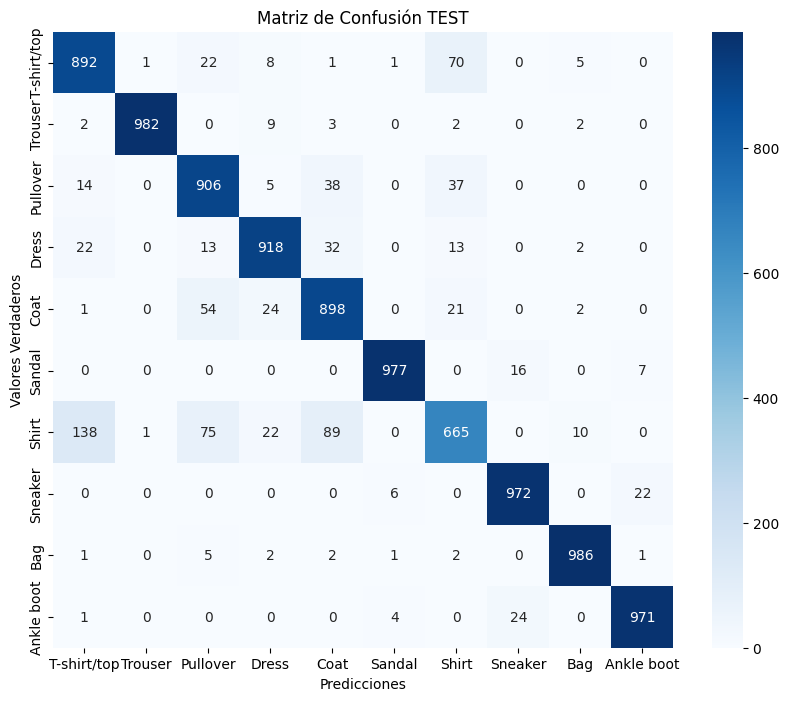

In [13]:
#Etiquetas para los ejes de la matriz de confusión
etiqueta = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
# Mostramos la matriz de confusión de TEST con anotaciones de aciertos y fallos
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=etiqueta, yticklabels=etiqueta)
plt.title('Matriz de Confusión TEST')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [14]:
#Reporte de clasificación para análisis de TEST
print(classification_report(np.argmax(y_test, axis=-1), y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       1.00      0.98      0.99      1000
           2       0.84      0.91      0.87      1000
           3       0.93      0.92      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.99      0.98      0.98      1000
           6       0.82      0.67      0.73      1000
           7       0.96      0.97      0.97      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [15]:
#####################################################
# Predecimos las etiquetas para el conjunto de TRAIN#
#####################################################
#                                                   #
y_pred = np.argmax(model.predict(X_train), axis=-1)

1875/1875 [==============================] - 4s 2ms/step


In [16]:
# Generar la matriz de confusión de TRAIN
conf_matrix = confusion_matrix(np.argmax(y_train, axis=-1), y_pred)


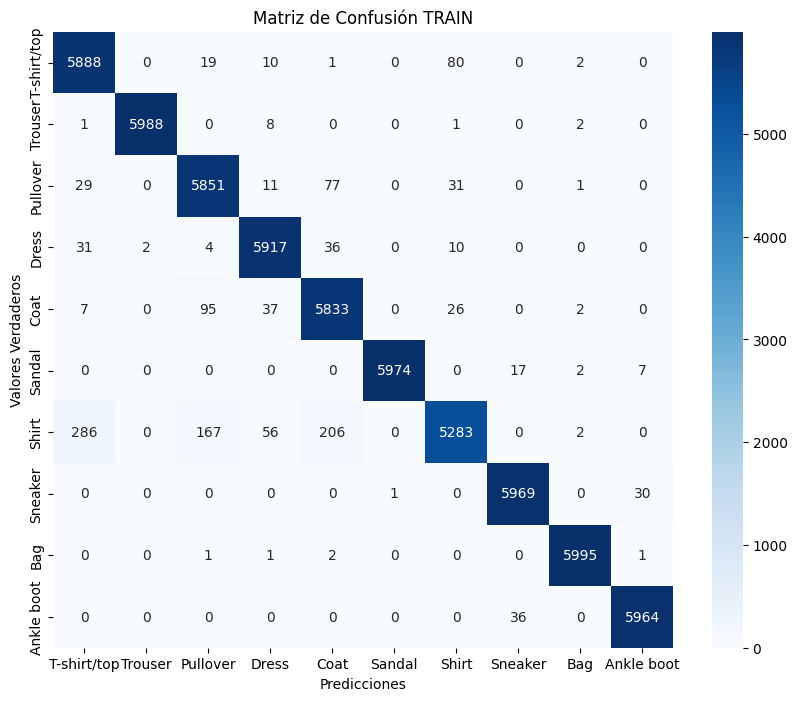

In [17]:
# Mostramos la matriz de confusión de TRAIN con anotaciones de aciertos y fallos
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=etiqueta, yticklabels=etiqueta)
plt.title('Matriz de Confusión TRAIN')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()

In [18]:
#Reporte de clasificación para análisis de TRAIN
print(classification_report(np.argmax(y_train, axis=-1), y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6000
           1       1.00      1.00      1.00      6000
           2       0.95      0.98      0.96      6000
           3       0.98      0.99      0.98      6000
           4       0.95      0.97      0.96      6000
           5       1.00      1.00      1.00      6000
           6       0.97      0.88      0.92      6000
           7       0.99      0.99      0.99      6000
           8       1.00      1.00      1.00      6000
           9       0.99      0.99      0.99      6000

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

